In [15]:
pip install librosa

  Using cached librosa-0.10.1-py3-none-any.whl (253 kB)
Note: you may need to restart the kernel to use updated packages.  Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
  Using cached pooch-1.8.1-py3-none-any.whl (62 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
  Using cached soxr-0.3.7-cp39-cp39-win_amd64.whl (184 kB)
  Using cached platformdirs-4.2.0-py3-none-any.whl (17 kB)



In [20]:

import IPython

# Demo: raw audio sample
IPython.display.Audio("C:/Users/rodea/Documents/GitHub/Infant-Crying-Classification/Data/burping/5afc6a14-a9d8-45f8-b31d-c79dd87cc8c6-1430757039803-1.7-m-48-bu.wav")

In [21]:

import librosa

# load audio file into signal (np.ndarray) and sampling rate
signal, sr = librosa.load(path="C:/Users/rodea/Documents/GitHub/Infant-Crying-Classification/Data/burping/5afc6a14-a9d8-45f8-b31d-c79dd87cc8c6-1430757039803-1.7-m-48-bu.wav", sr=16000)

Shape of signal: (53280,)


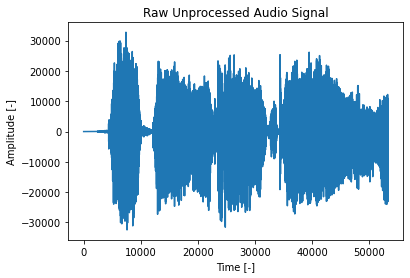

In [26]:
##THis in time domain
import matplotlib.pyplot as plt

# plot raw waveform
plt.plot(signal)
plt.title("Raw Unprocessed Audio Signal")
plt.ylabel("Amplitude [-]")
plt.xlabel("Time [-]")
print('Shape of signal: {}'.format(signal.shape))

Shape of signal: (53280,)


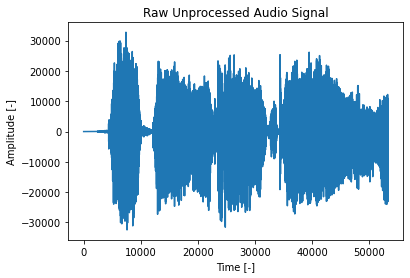

In [27]:

from scipy.io import wavfile as wav

# read .wav file with scipy
sr, signal = wav.read("C:/Users/rodea/Documents/GitHub/Infant-Crying-Classification/Data/burping/5afc6a14-a9d8-45f8-b31d-c79dd87cc8c6-1430757039803-1.7-m-48-bu.wav")
plt.plot(signal)
plt.title("Raw Unprocessed Audio Signal")
plt.ylabel("Amplitude [-]")
plt.xlabel("Time [-]")
print('Shape of signal: {}'.format(signal.shape))

<BarContainer object of 26640 artists>

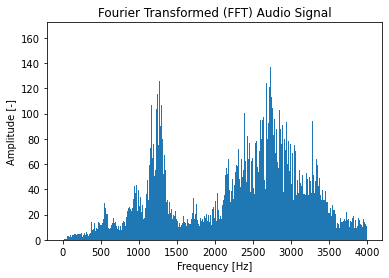

In [28]:
import numpy as np

# perform FFT on signal
fft = np.fft.fft(signal)

# get length of signal
N = signal.size

# equally spaced intervals (max. frequency is N-1)
f = np.linspace(0, sr, N)

# plot frequency spectrum (w.r.t. Nyquist frequency >= 2 * max. natural frequency)
plt.title("Fourier Transformed (FFT) Audio Signal")
plt.ylabel("Amplitude [-]")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor

In [30]:
# load audio file into signal (np.ndarray) and sampling rate
signal, sr = librosa.load(path="C:/Users/rodea/Documents/GitHub/Infant-Crying-Classification/Data/burping/5afc6a14-a9d8-45f8-b31d-c79dd87cc8c6-1430757039803-1.7-m-48-bu.wav", sr=16000)
print('Signal length: {:.2f} seconds'.format(float(signal.size)/sr))

# STFT
# n_fft: frame/window size, i.e., amount of samples to use for computing FFT
n_fft = 2048
print('n_fft: {} seconds'.format(float(n_fft)/sr)) # units of seconds

# hop_length: sliding window step size
hop_length = 512
print('hop_length: {} seconds'.format(float(hop_length)/sr)) # units of seconds

# compute STFT using librosa
X = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
print('STFT has {} frequency bins and {} frames in time'.format(X.shape[0], X.shape[1]))

Signal length: 6.66 seconds
n_fft: 0.128 seconds
hop_length: 0.032 seconds
STFT has 1025 frequency bins and 209 frames in time


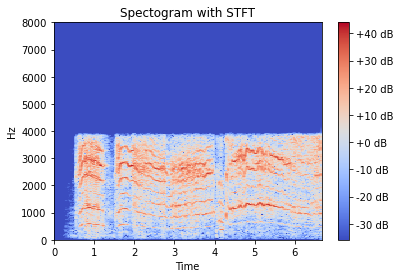

In [31]:
from librosa.display import specshow
# human perception of sound intensity is logarithmic in nature
# log amplitude of signal
S = librosa.amplitude_to_db(abs(X))

# plot spectogram
specshow(S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.title("Spectogram with STFT")
plt.colorbar(format='%+2.0f dB')

Text(0.5, 1.0, 'Mel-Spectogram of STFT')

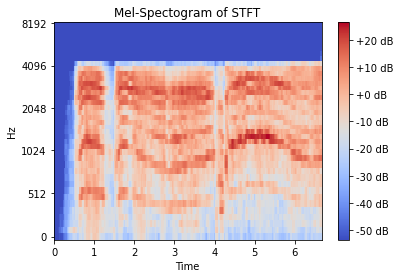

In [32]:

# number of mel bands to generate
n_mels = 40

# compute mel-scale spectogram
S = librosa.feature.melspectrogram(y=signal,
                                   sr=sr, 
                                   n_fft=n_fft, 
                                   hop_length=hop_length,
                                   n_mels=n_mels)
# log amplitude
S = librosa.power_to_db(S)

# plot spectogram
specshow(S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectogram of STFT")

(39, 209)


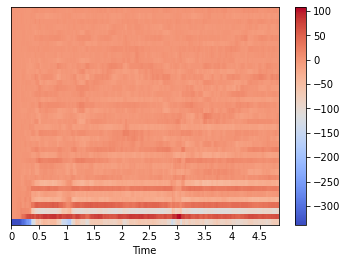

In [33]:

# number of MFCCs to return (usually <= n_mels)
n_mfcc = 39

# compute MFCCs
mfccs = librosa.feature.mfcc(y=signal, 
                             sr=sr, 
                             n_mfcc=n_mfcc, 
                             hop_length=hop_length,
                             n_fft=n_fft,
                             n_mels=n_mels)

# plot MFCCs
specshow(mfccs, x_axis='time')
plt.colorbar()
print(mfccs.shape)

In [34]:
%%capture
!pip install speechpy

(204, 39)


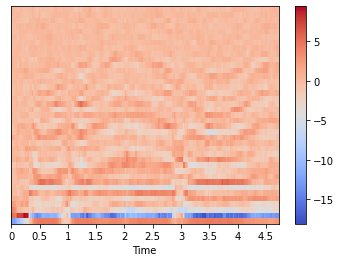

In [35]:

# alternative using speechpy
import speechpy

# define frame size and stride in seconds
frame_length = n_fft / sr
frame_stride = hop_length / sr

# compute MFCCs
mfccs = speechpy.feature.mfcc(signal=signal, 
                      sampling_frequency=sr, 
                      frame_length=frame_length,
                      frame_stride=frame_stride,
                      fft_length=n_fft,
                      num_filters=n_mels,
                      num_cepstral=n_mfcc)

# plot MFCCs
specshow(mfccs.T, x_axis='time')
plt.colorbar()
print(mfccs.shape)
     

In [37]:
import os
from shutil import copyfile

# `.wav` files are named as: 
# Positions 1-2: number of speaker
# Positions 3-5: code for text
# Position 6: emotion (sorry, letter stands for german emotion word)
# Position 7: if there are more than two versions these are numbered a, b, c

reasons = {
    'A':'belly_pain', 
    'B':'burping', 
    'C':'discomfort', 
    'D':'hungry', 
    'E':'tired', 
   
}

# create dirs for emotions
base_path = "C:/Users/rodea/Documents/GitHub/Infant-Crying-Classification/Data"
for e in reasons.values():
  directory = os.path.join(base_path, e)
  if not os.path.exists(directory):
    os.makedirs(directory)


     

In [49]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle